In [2]:
import sys
sys.path.append('../')
import geopandas as gpd
from api.app.utils import (
    load_grids,
    get_interpolated_data,
    get_heat_index,
    adjust_heat_index,
    categorize_heat_index,
    transform_polygons
)
# import colormaps from matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
from rasterio.features import shapes
from shapely.geometry import shape
import geopandas as gpd
grids_path = '../api/app/data/grids.json'

In [3]:
grids, idx_to_row_col = load_grids(grids_path)
grid_temperature, grid_humidity = get_interpolated_data(grids)
heat_index = get_heat_index(grid_temperature, grid_humidity)
adjusted_heat_index = adjust_heat_index(heat_index, grids["terrain"])
categorized_heat_index = categorize_heat_index(adjusted_heat_index)

# Create GeoDataFrame with polygons
# For some reason we need to transpose the array (to fix)
shape_gen = ((shape(s), v) for s, v in shapes(categorized_heat_index.T.astype("uint8")))
polygons = gpd.GeoDataFrame(
    dict(zip(["geometry", "class"], zip(*shape_gen))), crs="EPSG:4326"
)
transformed_polygons = transform_polygons(polygons, grids)

/var/folders/j5/zd8npw6n33db23qmzf90zdmh0000gn/T/ipykernel_69766/1210308666.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(adjusted_heat_index, cmap=cm.get_cmap('jet', 6))


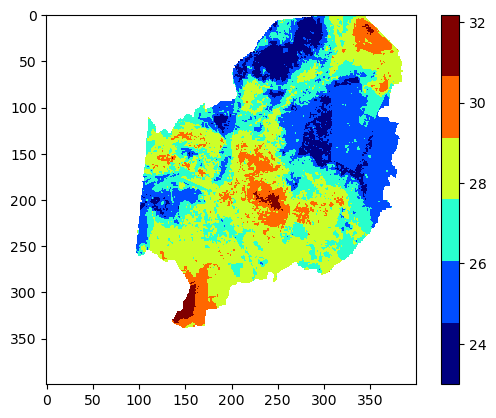

In [4]:
plt.imshow(adjusted_heat_index, cmap=cm.get_cmap('jet', 6))
plt.colorbar()

In [4]:
transformed_polygons.explore()